# Fitting and Simulating Archimedean Gumbel, Clayton and Frank Copulas

In this jupyter notebook, we implement algos to fit and simulate bivariate Archimedean copulas. 

To fit Archimedean copulas we will use the Kendall distribution function. 

To simulate Archimedean copulas we will invert the Kendall distribution function using numerical root finding. 

There is plenty of materials from where you can enjoy the mathematics of the Copula functions. Our intention is not to add more maths to such long and reach lists of books and research papers. Rather, we just want to implement in Python some of the many copula objects we personally found useful when fitting and simulating data to the Gumbel, Clayton and Frank copulas.

The various copula objects we are using were collected from the following materials:

Marshall A, Olkin I, 1988. Families of multivariate distributions. Journal of the American Statistical Association, 83: 834-841.

Genest C, Rivest LP, 1993. Statistical inference procedures for bivariate archimedean copulas. Journal of the American Statistical Association, 88: 1034-1043.

Genest C, MacKay J, 1986. The Joy of copulas: bivariate disributions with uniform marginals. Journal of the American Statistical Association, 88: 280-283.

Frees EW, Valdez EA, 1998. Understanding relationships using copulas. North American Actuarial Journal, 2: 1-25.

Cherubini U, Luciano E, 2001. Value-at-risk trade-off and capital allocation with copulas. Economic Notes, 30: 235–256.

Cherubini U, Luciano E, Vecchiato W, 2004. Copula Methods in Finance, Wiley.

### Copula definition 

A copula is a function that links univariate marginals to their full multivariate distribution.

For $m $ uniform RV's, $U_1$, $U_2$,..,$U_m$   , the joint distribution function, called copula function, $C$, is defined as:
.

$$C(u_1, u_2,..,u_m) = P(U_1<=u_1, U_2<=u_2,..,U_m<=u_m)$$
.

We can also use the copula function, $C$, to connect univariate marginal distribution functions, $F_1(x_1),F_1(x_2),..,F_m(x_m)$ to their joint distribution function, $F(x_1,x_2,..,x_m)$   
.
$$C(F_1(x_1),F_1(x_2),..,F_m(x_m)) = F(x_1,x_2,..,x_m)$$

.

Sklar (1959) also showed the converse, that is, any joint distribution function, $F$, can be seen as a copula function. He proved that if $F(x_1,x_2,..,x_m)$ is a joint multivariate distribution function with univariate marginal distribution functions, $F_1(x_1),F_1(x_2),..,F_m(x_m)$, then there exists a copula function $C(u_1, u_2,..,u_m)$, such that the following holds:

$$F(x_1,x_2,..,x_m)=C(F_1(x_1),F_1(x_2),..,F_m(x_m))$$


An important attribute of the copula function, is that it allows modelling dependencies independently from the marginal distributions. 


### Archimedean Copulas

#### Definition 

As this note is about fitting Archimedean Copulas, we will exploit the following representation of an Archimedean Copula in terms of its generator:

$$C(u_1, u_2,..,u_m) = \varphi^{-1}[\varphi(u_1)+\varphi(u_2)+..+\varphi(u_m)]$$

where:

- $\varphi$ is the generator and 
- $\varphi^{-1}$ is the inverse of the generator, 

satisfying the following conditions:
- $\varphi(1)=0$ 
- $\varphi^{'}$$(t)$<0, for all $t$ in [0,1], meaning that $\varphi(t)$ is a decreasing function and that 
- $\varphi^{''}$$(t)$>0, for all $t$ in [0,1], meaning that $\varphi(t)$ is a convex function.


#### Kendall distribution function

A nice tool to describe dependence is Kendall distribution function, $K(t)$. Given two RV's $U_1$ and $U_2$ with distribution, $C$, the copula, then the Kendall function is defined as 

$K(t)=P(C(U_1,U_2)<=t)$  Genest and Rivest (1993).

We will see below how the Kendall function is constructed with the help of the copula generator function and how it will help find the "best" copula.

### Copula objects required

Let's now be more specific about the generators of our three Archimedean copulas, and also write few more objects we need in this exercise. 

#### Kendall's $\tau$ rank correlation coefficient, based on the copula generator $\varphi$ and its derivative $\varphi^{'}$

$$\tau = 1+4\int_{0}^1 \frac{\varphi(t)}{\varphi^{'}(t)}dt$$

(in Genest and MacKay 1986)

#### Kendall's $\tau$ rank correlation coefficient, based on the copula density 

$$\tau = 4\int_{0}^1\int_{0}^1 C(u,v)dC - 1 = 4\int_{0}^1\int_{0}^1 C(u,v)\frac{\delta^{2}{C}}{\delta{u}\delta{v}}dvdu - 1$$

with $dC = \frac{\delta^{2}{C}}{\delta{u}\delta{v}}dvdu$ being the copula differential

#### Gumbel Copula's objects 

Generator function:

$\varphi(t)=(-ln(t))^\theta$ 

Derivative of the Generator:

$\varphi^{'}(t)=-\frac{\theta}{t}(-ln(t))^{\theta-1}$ 

Inverse of the Generator function:

$\varphi^{-1}(t)=e^{-t^{\frac{1}{\theta}}}$ 

Parameter:

$\theta=\frac{1}{1-\tau}>=1$ 

Copula function is defined with the help of generator function:

$C(u_1, u_2) = e^{-([(-ln(u_1)^\theta)+ (-ln(u_2)^\theta)])^{1/\theta}}$

Kendall distribution function is defined with the help of generator function:

$K(t) = t - \frac{\varphi(t)}{\varphi^{'}(t)} = t -t\frac{ln(t)}{\theta} $

#### Clayton Copula's objects 

Generator function:

$\varphi(t)=t^{-\theta}-1$ 

Derivative of the Generator:

$\varphi^{'}(t)=-\theta t^{-\theta-1}$ 

Inverse of the Generator function:

$\varphi^{-1}(t)=(1+t)^{-\frac{1}{\theta}}$

Parameter:

$\theta= \frac{2\tau}{1-\tau}>0$ 

Copula function is defined with the help of generator function:

$C(u_1, u_2) = {(u_1^\theta + u_2^\theta - 1)^{-\frac{1}{\theta}}}$


Kendall distribution function is defined with the help of generator function:

$K(t) = t - \frac{\varphi(t)}{\varphi^{'}(t)} = t -\frac{t^{\theta+1}-t}{\theta} $

#### Frank Copula's objects

Generator function:

$\varphi(t)=-ln\frac{e^{-t\theta}-1}{e^{-\theta}-1}$ 

Derivative of the Generator:

$\varphi^{'}(t)=\frac{\theta}{1-e^{t\theta}}$ 

Inverse of the Generator function:

$\varphi^{-1}(t)={-\frac{ln(e^{-t-\theta}-e^{-\theta}+1)}{\theta}}$

Parameter:

$-\inf<\theta<\inf$ 

Copula function is defined with the help of generator function:

$C(u_1, u_2) = -\frac{1}{\theta}ln(1+\frac{(e^{-\theta u_1}-1)(e^{-\theta u_2}-1)}{e^{-\theta}-1})$


Kendall distribution function is defined with the help of generator function:

$K(t) = t - \frac{\varphi(t)}{\varphi^{'}(t)} = t -\frac{e^{\theta t}-1}{\theta} ln\frac{(e^{-\theta t}-1)}{(e^{-\theta}-1)}$

#### Example on how to link the inverse of the generator to the bivariate Independent Copula $C(u_1,u_2)$ for two uniform variables $U_1$ and $U_2$  

Bivariate Archimedean Copula:

$$C(u_1, u_2) = \varphi^{-1}[\varphi(u_1)+\varphi(u_2)]$$

Generator function:

$\varphi(t)$ = -$ln(t)$

Inverse of the Generator:

$\varphi^{-1}(\varphi(u_1)+\varphi(u_2))$ = $exp(-(ln(u_1)+ln(u_2)))$


and we arrive at the independent Copula function as the product below 

Copula function

$C(u_1,u_2) = u_1u_2$

In [8]:
!pip install -q xlrd
!git clone https://github.com/chekaru/Fitting_and_Simulating_Archimedean_Copulas.git

Cloning into 'Fitting_and_Simulating_Archimedean_Copulas'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [11]:
import os
files = os.listdir(os.curdir)
print(files)

['.config', 'Fitting_and_Simulating_Archimedean_Copulas', 'sample_data']


In [10]:
# Files from the cloned git repository.
!ls Fitting_and_Simulating_Archimedean_Copulas

ArchimedeanCopulaV4.ipynb  README.md  Returns.csv


### Libraries and Data

In [2]:
import numpy as np
import math
import scipy.integrate
import pandas as pd

from scipy.special  import comb
from scipy.stats    import norm
from scipy.optimize import root
from scipy.optimize import newton

import numpy.random as npr
import scipy.stats as scs

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Our data contains simulated dependent equity returns. The way we generated our data is explained in the section Simulating Archimedean Copulas: we used a normal distribution ~$N(0,1)$ to generate the returns, the marginals, and we joint them with a Gumbel copula.

In case your data is still normal, however with different mean and sd, remove the average and divide by the standard deviation.

In [15]:
# Data contains Simulated Equity Returns 
Returns = pd.read_csv('Fitting_and_Simulating_Archimedean_Copulas/Returns.csv', index_col=False)
print (Returns.head(2))
print (Returns.tail(2))
size = len(Returns)

          X         Y
0 -0.555892 -0.247987
1 -1.203095 -0.779378
            X         Y
998 -1.206702 -0.980869
999  1.066642  1.255402


### Analysing the Marginals

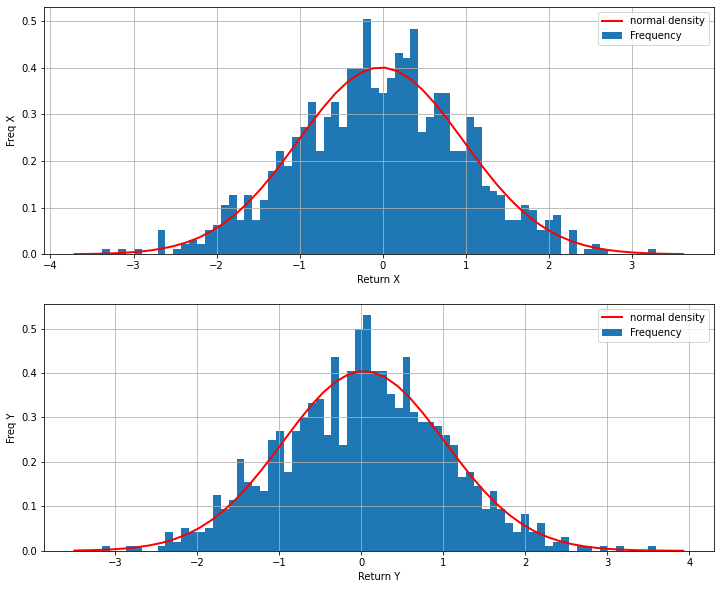

In [16]:
symbols = ['X', 'Y']

plt.figure(figsize=(12, 10)) 

val = 0 
plt.subplot(211)
Returns[symbols[val]].hist(bins=70, density=True, label='Frequency')
plt.grid(True)
plt.xlabel('Return ' + symbols[val])
plt.ylabel('Freq ' + symbols[val])
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=np.mean(Returns[symbols[val]]), scale=np.std(Returns[symbols[val]])),'r', lw=2.0, label='normal density')
plt.legend()

val = 1
plt.subplot(212)
Returns[symbols[val]].hist(bins=70, density=True, label='Frequency')
plt.grid(True)
plt.xlabel('Return ' + symbols[val])
plt.ylabel('Freq ' + symbols[val])
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=np.mean(Returns[symbols[val]]), scale=np.std(Returns[symbols[val]])),'r', lw=2.0, label='normal density')
plt.legend()
plt.show()

The marginals look very much normally distributed!

### Creating uniform variates

From the copula definition, we understand we need to work with uniform variates.
To do so we apply a "non linear" transformation to the normal distributed equity returns. Obviously, if the marginals were not normally distributed we would have applied a different transformation.

$\Phi(x) = u$

In [17]:
# As an example, in python this is achieved as
print(norm.cdf(0.394630007))
print(norm.cdf(-0.849660998))

0.6534420175848601
0.19775679413189762


In [18]:
# With the inverse we recover the same input above
print(norm.ppf(0.653442018))

0.39463000812486765


In [19]:
ReturnsData = pd.DataFrame(norm.cdf(Returns))
ReturnsData.columns =['X', 'Y']
print (ReturnsData.head(3))
print (ReturnsData.tail(2))
size = len(ReturnsData)

          X         Y
0  0.289142  0.402072
1  0.114470  0.217879
2  0.190621  0.736661
            X         Y
998  0.113773  0.163329
999  0.856933  0.895334


### Analysing the dependence structure

The main idea is that the dependence structure should not be affected by the marginal distributions. This is the essence of the copula function.

When investigating the dependence structure between two RV's, we need a measure which is "invariant under strictly increasing transformations of the underlying RV's".

The use of the Pearson's linear correlation coefficient is well widespread in all area of research. However, we have to be aware that the linear correlation coefficient is certainly NOT invariant. This is because it depends not only on the copula, but also on the marginals.

Previously, we applied a non-linear transformation to our initial data. 

Let's check the effect of such non-linear transformation on the linear correlation.

In [20]:
print (np.corrcoef(Returns.X, Returns.Y)[1,0])
print (np.corrcoef(ReturnsData.X, ReturnsData.Y)[1,0])

0.6791102807353128
0.6594017796464725


As anticipated, the Pearson's linear correlation coefficients are different!

#### Kendall's  $\tau$ rank correlation coefficient 

We need an "invariant" coefficient to measure the dependence structure. Kendall's $\tau$ rank correlation coefficient is known to be invariant!

The non parameteric estimation of the Kendall's $\tau$ rank correlation coefficient is below. 

We wil also implement and use later the Kendall's $\tau$ rank correlation coefficient based on the generator of the copula function.

Non parametric Kendall's $\tau$ rank correlation coefficient

In [21]:
def KendallCorrelationNonParametric(X, Y):
    #Estimate Kendall's correlation coefficient using nonparametric estimator
    n = len(X)
    s = 0
    for i in range(n):
        for j in range(i,n):
            if j > i:
                a = (X[i] - X[j]) * (Y[i] - Y[j])
                s +=np.sign(a)            
    return comb(n, 2) ** (-1) * s

Let's use the non parametric Kendall's estimator on the same data. We will check that the Kendall's correlation coefficient based on a Copula returns the same value below, later in this notebook.

In [22]:
tau_data =  (KendallCorrelationNonParametric(ReturnsData.X, ReturnsData.Y))
print (tau_data)
print (KendallCorrelationNonParametric(Returns.X, Returns.Y))

0.4772092092092092
0.4772092092092092


As it was stated above, Kendall's $\tau$ rank correlation coefficient is invariant after applying a non linear transformation to the data

### Non parametric estimate of the Kendall distribution function

We now need a non parametric estimate of the Kendall-Copula function based on the data available. This will be the function that we want to fit with the three Archimedean Copulas we introduced earlier.

In [23]:
def Kendall_NonParametric(X, Y, pos):
    # The actual Copula based on data
    pos = int(pos)    
    n = len(X)
    Ts = 0
    for j in range(n):
        if (X[j] < X[pos]) & (Y[j] < Y[pos]):
            Ts += 1        
    return  Ts / (n - 1)

In [24]:
#let's test what it does on few data point
ff = [0, 1, 2, 5, 10, 20]
for i in ff:
    print(Kendall_NonParametric(ReturnsData.X, ReturnsData.Y,i))

0.2072072072072072
0.06706706706706707
0.1971971971971972
0.33433433433433435
0.5595595595595596
0.5115115115115115


In [25]:
Margins = []
for i in range(1000):
    Margins.append(Kendall_NonParametric(ReturnsData.X, ReturnsData.Y,i))

In [26]:
# Create the dataframe for the Kendall function, called MarginsDF
MarginsDF = pd.DataFrame(Margins)
MarginsDF.columns =['K']
MarginsDF.head()
del(Margins)

In [27]:
# Now we prepare the Reporting Table
# 1 - the Distribution Points, called t
dt     = 0.00001
t      = [dt]
delta  = 0.05
for i in range(20):
    tt = delta + t[-1]
    t.append(min(1,tt))

Frequency = pd.DataFrame(t)
Frequency.columns =['t']
#Frequency

In [28]:
# 2 - the Cumulative points
Cumulative = []
j = 0
for i in range(21):
    value = Frequency['t'].loc[i]
    Cumulative.append(MarginsDF.loc[MarginsDF['K'] <= value].count(axis=0)[0])
del(value)

In [29]:
Frequency['KCumulative'] = Cumulative
del(Cumulative)

In [30]:
MarginsDF.loc[MarginsDF['K'] <=0.00001].count(axis=0)

K    2
dtype: int64

In [31]:
# 3 - the and the Density and the Sample Points
Array    = Frequency['KCumulative'].diff()
Array[0] = Frequency['KCumulative'].loc[0]
Frequency['KDensity'] = Array
Denominator =  Frequency['KCumulative'].loc[20]
Frequency['KSample'] = Frequency['KCumulative']/Denominator
del(Denominator)
del(Array)

In [32]:
Frequency

,t,KCumulative,KDensity,KSample
0,0.00001,2,2.0,0.002
1,0.05001,123,121.0,0.123
2,0.10001,216,93.0,0.216
3,0.15001,293,77.0,0.293
4,0.20001,358,65.0,0.358
5,0.25001,418,60.0,0.418
6,0.30001,475,57.0,0.475
7,0.35001,531,56.0,0.531
8,0.40001,586,55.0,0.586
9,0.45001,635,49.0,0.635


### Which Copula describes our data?

After building our data set, we are now ready to write our three Archimedean Copulas, and then use them to estimate and select the best one!  

#### Clayton, Gumbel and Frank Copulae 

In [33]:
from scipy.integrate import quad, dblquad
# Copula Class
class Copula(object):
    def __init__(self, tau):
        self.tau   = tau
        self.theta = self.f_theta(self.tau)
    
    def LoadData(self, X, Y):
        self.X     = X
        self.Y     = Y
    
    def CopulaFunction(self, u, v):
        x = self.Generator(u)
        y = self.Generator(v)  
        return self.GeneratorInverse(x+y)
    
    # Numerical implementation of the copula derivative.
    def CopuladensityNumerical(self, u, v):
        h = 0.0001
        u_plus = min(u + h,1)
        u_minus= max(0,u-h)
        v_plus = min(v + h,1)
        v_minus=max(0, v-h)
        
        x_plus = self.Generator(u_plus)
        y_plus = self.Generator(v_plus)  
        x_minus = self.Generator(u_minus)
        y_minus = self.Generator(v_minus)  
        
        ss =  self.GeneratorInverse(x_plus + y_plus)  - self.GeneratorInverse(x_plus + y_minus) - \
              self.GeneratorInverse(x_minus + y_plus) + self.GeneratorInverse(x_minus + y_minus)
        
        ss = max(0, ss)
        return ss / (4.0 * h * h)
    
    def Copula_tau(self):            
        def f(u,v):
            a = self.CopulaFunction(u,v)
            b = self.CopuladensityNumerical(u,v)                
            return a * b
        res = dblquad(f, 0, 1, lambda x: 0, lambda x: 1)[0]
        
        return 4.0 * res - 1
   
    def KendallDistribution(self, t):
        pass

    def derivativeKendallDistribution(self, t):
        pass

    def Generator(self, t):
        pass

    def GeneratorInverse(self, t):
        pass

    def derivativeGenerator(self, t):
        pass

    def Integral_tau(self):    
        def f(t): 
            return self.Generator(t)/self.derivativeGenerator(t) 
        Integrale = scipy.integrate.quad(f, 0, 1)[0]      
        return 1 + 4*Integrale

    def f_tau(self, theta):
        pass
    
    def f_theta(self, tau):
        pass

# Gumbel Copula
class Gumbel(Copula):    
    def __init__(self, tau):
        Copula.__init__(self, tau)
        
    def KendallDistribution(self, t):
        return t - (t*np.log(t)/self.theta)

    def derivativeKendallDistribution(self, t):
        return 1 -np.log(t)/self.theta - 1/ self.theta

    def Generator(self, t):
        return (-np.log(t))**self.theta

    def GeneratorInverse(self, t):
        return np.exp(-t**(1/self.theta))

    def derivativeGenerator(self, t):
        return -1/t*self.theta*(-np.log(t))**(self.theta-1)
    
    def f_tau(self, theta):
        return 1 - 1/theta
    
    def f_theta(self, tau):
        return 1/(1-tau)
        
# Clayton Copula
class Clayton(Copula):    
    def __init__(self, tau):
        Copula.__init__(self, tau)
    
    def KendallDistribution(self, t):
        return t - (t**(self.theta + 1) - t)/self.theta

    def derivativeKendallDistribution(self, t):
        return 1 + 1/self.theta - 1/self.theta*(t**self.theta *(self.theta + 1))

    def Generator(self, t):
        return (t**(-self.theta)-1)

    def GeneratorInverse(self, t):
        return (1+t)**(-1/self.theta)

    def derivativeGenerator(self, t):
        return (-self.theta)*(t)**(-self.theta-1)

    def f_tau(self, theta):
        return theta/(theta + 2)
    
    def f_theta(self, tau):
        return 2*tau / (1-tau)

# Frank Copula
class Frank(Copula):    
    def __init__(self, tau):
        Copula.__init__(self,tau)    
    
    def KendallDistribution(self, t):
        num = (np.exp(-self.theta*t) -1)
        den = (np.exp(-self.theta)   -1)
        return t - (np.exp(self.theta*t)-1)/self.theta * np.log(num/den)

    def derivativeKendallDistribution(self, t):
        return -np.exp(self.theta*t)*(np.log((np.exp(-self.theta*t)-1)/(np.exp(-self.theta)-1)) + self.theta*(1-t))
    
    def Generator(self, t):
        num = np.exp(-self.theta*t) - 1
        den = np.exp(-self.theta)   - 1
        return -np.log(num/den)

    def GeneratorInverse(self, t):
        return -(1/self.theta)*np.log(np.exp(-self.theta-t) - np.exp(-t)  + 1)
    
    def derivativeGenerator(self, t):
        return self.theta / (1-np.exp(self.theta*t))
    
    def f_tau(self, theta):
        def f(t):
            return t/(np.exp(t)-1)   
        Integrale = scipy.integrate.quad(f, 0, theta)[0]      
        Dtheta = 1/theta*Integrale    
        return 1 - 4*(1-Dtheta)/theta

    def f_theta(self,tau):
        def f(x):
            return self.f_tau(x) - tau
        sol = root(f, 0.5) 
        return sol.x[0]

#### Instance of a Class Frank 

In [42]:
frank = Frank(tau_data)
frank.LoadData(ReturnsData.X, ReturnsData.Y)
frank.theta

5.336713727737315

###### The theta parameter
frank.f_theta(tau_data)

In [ ]:
# A copula value, given u and v
frank.CopulaFunction(.1,.5)

0.08829348191395167

In [ ]:
# Let's check the integral from 0 to 1 of the Frank copula density adds up to 1, as it is a probability distribution
np.round(dblquad(frank.CopuladensityNumerical, 0, 1, lambda x: 0, lambda x: 1)[0],9)

1.0

#### Instance of a Class Gumbel 

In [34]:
# Instance of a Class Gumbel
gumbel = Gumbel(tau_data)
gumbel.LoadData(ReturnsData.X, ReturnsData.Y)
# The theta parameter
print(gumbel.theta)

1.9128110472018196


In [35]:
# A copula value, given u and v
gumbel.CopulaFunction(.1,.5)

0.08883853655797866

In [36]:
# Let's check the integral from 0 to 1 of the Gumbel copula density adds up to 1, as it is a probability distribution
# There are some runtime errors. We will investigate
np.round(dblquad(gumbel.CopuladensityNumerical, 0, 1, lambda x: 0, lambda x: 1)[0],9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:865: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  **opt)


0.999905931

#### Instance of a Class Clayton 

In [37]:
# Instance of a Class Cayton
clayton = Clayton(tau_data)
clayton.LoadData(ReturnsData.X, ReturnsData.Y)
# The theta parameter
print(clayton.theta)

1.8256220944036392


In [38]:
# A copula value, given u and v
clayton.CopulaFunction(.1,.5)

0.09797685153159634

In [39]:
# Let's check the integral from 0 to 1 of the clayton copula density adds up to 1, as it is a probability distribution
# There are some runtime errors. We will investigate 
np.round(dblquad(clayton.CopuladensityNumerical, 0, 1, lambda x: 0, lambda x: 1)[0],9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars


0.999956723

#### Kendall's  $\tau$  rank correlation coefficient

Kendall non parametric:

In [40]:
# Again, Kendall tau is invariant!
print (KendallCorrelationNonParametric(ReturnsData.X, ReturnsData.Y))
print (KendallCorrelationNonParametric(Returns.X, Returns.Y))

0.4772092092092092
0.4772092092092092


Using the generator of the copula:

As stated above, the copula Kendall's parameters $\tau$ can also be calculated using the generator of the copula. We use python quad to solve the integral. See the implementation in the super class Copula. 

In [43]:
print(gumbel.Integral_tau())
print(clayton.Integral_tau())
print(frank.Integral_tau())

0.4772092092092093
0.47720920920487386
0.4772092092092117


Analytically, but with one exception:

Alternatively, we can first analytically solve the integral and so use a simple function for $\tau$. Unfortunately, this route is completely true for the Clayton and Gumbel copula. For the Frank copula, we still need to rely on Python quad as a debye function needs to be numerically evaluated to calculate Frank's $\tau$ 

In [44]:
print(gumbel.f_tau(gumbel.theta))
print(clayton.f_tau(clayton.theta))
print(frank.f_tau(frank.theta))

0.4772092092092092
0.4772092092092092
0.4772092092092092


Using the copula representation:

In [45]:
# There are some runtime warnings when integrating the numerical version of the Copula density. We aim to replace soon 
# the numerical density with a analytical implementation and so remove these errors too

# Clayton and Frank tau:
# They are almost identical to the previous tau vaues.

# Gumbel tau:
# some difference!

print(clayton.Copula_tau())
print(frank.Copula_tau())
print(gumbel.Copula_tau())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in log


0.4772091713454307
0.4772092025108212
0.4770319554420932


#### Calculate the Kendall distribution function for Clayton, Gumbel and Frank copula 

In [46]:
ClaytonArray = []
for i in range(21):
    t = Frequency['t'].loc[i]
    ClaytonArray.append(clayton.KendallDistribution(t))
del(t)

In [47]:
GumbelArray = []
for i in range(21):
    t = Frequency['t'].loc[i]
    GumbelArray.append(gumbel.KendallDistribution(t))
del(t)

In [48]:
FrankArray = []
for i in range(21):
    t = Frequency['t'].loc[i]
    FrankArray.append(frank.KendallDistribution(t))
del(t)

In [49]:
Frequency['K_Clayton'] = ClaytonArray
Frequency['K_Gumbel']  = GumbelArray
Frequency['K_Frank']   = FrankArray
del(ClaytonArray)
del(GumbelArray)
del(FrankArray)

In [50]:
Frequency

,t,KCumulative,KDensity,KSample,K_Clayton,K_Gumbel,K_Frank
0,0.00001,2,2.0,0.002,0.000015,0.000070,0.000108
1,0.05001,123,121.0,0.123,0.077288,0.128327,0.132926
2,0.10001,216,93.0,0.216,0.153973,0.220394,0.216052
3,0.15001,293,77.0,0.293,0.229605,0.298784,0.285945
4,0.20001,358,65.0,0.358,0.303765,0.368293,0.348947
5,0.25001,418,60.0,0.418,0.376055,0.431198,0.407683
6,0.30001,475,57.0,0.475,0.446097,0.488839,0.463502
7,0.35001,531,56.0,0.531,0.513526,0.542103,0.517165
8,0.40001,586,55.0,0.586,0.577986,0.591621,0.569108
9,0.45001,635,49.0,0.635,0.639131,0.637863,0.619562


Let's create the sum of the square difference between each copula's Kendall and the sample K,endall and use it to identify the "best" copula. 

In [51]:
Frequency['Clayton'] = (Frequency['K_Clayton'] - Frequency['KSample'])**2
Frequency['Gumbel']  = (Frequency['K_Gumbel']  - Frequency['KSample'])**2 
Frequency['Frank']   = (Frequency['K_Frank']   - Frequency['KSample'])**2 

In [52]:
print(sum(Frequency.Gumbel))
print(sum(Frequency.Clayton))
print(sum(Frequency.Frank))

0.0015225412919063497
0.028254166698013596
0.004488501668380486


The Gumbel Copula shows the lowest sum of the squared differences and so it is our best one! But we knew this, as the dependency structure in the data we have just analysed was generated with a Gumbel copula. 

In [53]:
# Print our DataFrame
Frequency

,t,KCumulative,KDensity,KSample,K_Clayton,K_Gumbel,K_Frank,Clayton,Gumbel,Frank
0,0.00001,2,2.0,0.002,0.000015,0.000070,0.000108,0.000004,3.724172e-06,3.578386e-06
1,0.05001,123,121.0,0.123,0.077288,0.128327,0.132926,0.002090,2.838221e-05,9.853523e-05
2,0.10001,216,93.0,0.216,0.153973,0.220394,0.216052,0.003847,1.930581e-05,2.655260e-09
3,0.15001,293,77.0,0.293,0.229605,0.298784,0.285945,0.004019,3.345718e-05,4.977382e-05
4,0.20001,358,65.0,0.358,0.303765,0.368293,0.348947,0.002941,1.059469e-04,8.196143e-05
5,0.25001,418,60.0,0.418,0.376055,0.431198,0.407683,0.001759,1.741740e-04,1.064467e-04
6,0.30001,475,57.0,0.475,0.446097,0.488839,0.463502,0.000835,1.915133e-04,1.322091e-04
7,0.35001,531,56.0,0.531,0.513526,0.542103,0.517165,0.000305,1.232839e-04,1.914195e-04
8,0.40001,586,55.0,0.586,0.577986,0.591621,0.569108,0.000064,3.159457e-05,2.853528e-04
9,0.45001,635,49.0,0.635,0.639131,0.637863,0.619562,0.000017,8.194239e-06,2.383271e-04


### Simulating Archimedean Copulas

We are now going to introduce the simulation algo we used to generate the copula dependent equity returns data used in this notebook!

1. Simulate two independent ~$U[0,1]$ random variates, $s$ and $q$
2. Set $t = KendallInverse(q)$, where the $KendallInverse(q)$ is implemented in the class below 
3. Set $u =\varphi^{-1}(s\varphi(t))$ and
4. Set $v =\varphi^{-1}((1-s)\varphi(t))$

$u$ and $v$ are now copula dependent

To generate copula dependent equity returns, we assume that the equity returns are normal distributed ~$N(0,1)$

Set $x = \Phi^{-1}(u)$ and $y = \Phi^{-1}(v)$

The marginals are now normal distributed ~$N(0,1)$ with an Archimedean copula dependency.

We also found KendallInverse converging to its solution after very few steps.

#### Two simulation classes to implement the simulation algo

In [54]:
# Copula Class
class ArchimedeanSimulation(object):
    def __init__(self, tau, CopulaType):
        # CopulaType can be either:
        # C for Clayton,
        # G for Gumbel
        
        self.copula = ""
        if(CopulaType == "C"):
            self.copula = Clayton(tau_data) # an instance of class Clayton 
        else:
            self.copula = Gumbel(tau_data)  # an instance of class Gumbel
        
    def KendallInverse(self, q):       
        def f(t):
            return self.copula.KendallDistribution(t) - q
        
        return newton(f, 0.00001, fprime=self.copula.derivativeKendallDistribution)
    
    def Simulations(self, Number):
        npr.seed(30)
        sq      = npr.rand(Number, 2)
        self.uv = np.zeros([Number,2])
        
        for i in range(Number):                    
            q = sq[i,1]
            s = sq[i,0] 
            t = self.KendallInverse(q)
            self.uv[i,0] = self.copula.GeneratorInverse(s     * self.copula.Generator(t))
            self.uv[i,1] = self.copula.GeneratorInverse((1-s) * self.copula.Generator(t))
        
        self.M = norm.ppf(self.uv)
        
class ArchimedeanSimulationFrank(ArchimedeanSimulation):
    def __init__(self, tau):        
        # We found in the KendallInverse, the newton root finding not working with 
        # very small values of t, when the 1st derivative is used.
        # As a result, for the Frank Simulation, we are using a slower newton root
        
        self.copula = Frank(tau_data)  # an instance of class Frank
        
    def KendallInverse(self, q):       
        def f(t):
            return self.copula.KendallDistribution(t) - q
        
        return newton(f, 0.0000001)

In [55]:
Arch_C = ArchimedeanSimulation(tau_data,"C")
Arch_G = ArchimedeanSimulation(tau_data,"G")
Arch_F = ArchimedeanSimulationFrank(tau_data)

The Kendall Inverse allows us to calculate that $t$ that when it is used in the Kendall function recovers the same $q$ in the simulation algo.

There is no anaytical formulafor the Kendall Inverse, so in the classes $ArchimedeanSimulation$ and $ArchimedeanSimulationFrank$, we used two numerical root searches (with and without the use of the 1st derivative, respectively).

Let's check that our implementation is correct, so that we can recover K_Clayton, K_Gumbel and K_Frank as reported in the frequency dataframe.

In [56]:
t_K_Clayton = np.zeros([len(Frequency)])
t_K_Gumbel  = np.zeros([len(Frequency)])
t_K_Frank   = np.zeros([len(Frequency)])
for i in range(0, len(Frequency)):
    t_K_Clayton[i] = Arch_C.KendallInverse(Frequency.K_Clayton.loc[i])
    t_K_Gumbel[i]  = Arch_G.KendallInverse(Frequency.K_Gumbel.loc[i])
    t_K_Frank[i]   = Arch_F.KendallInverse(Frequency.K_Frank.loc[i])
    
arr = np.stack((t_K_Clayton, t_K_Gumbel, t_K_Frank), axis=1)
arr = np.round(arr,4)
print(arr)
# the t's are correct!

[[0.   0.   0.  ]
 [0.05 0.05 0.05]
 [0.1  0.1  0.1 ]
 [0.15 0.15 0.15]
 [0.2  0.2  0.2 ]
 [0.25 0.25 0.25]
 [0.3  0.3  0.3 ]
 [0.35 0.35 0.35]
 [0.4  0.4  0.4 ]
 [0.45 0.45 0.45]
 [0.5  0.5  0.5 ]
 [0.55 0.55 0.55]
 [0.6  0.6  0.6 ]
 [0.65 0.65 0.65]
 [0.7  0.7  0.7 ]
 [0.75 0.75 0.75]
 [0.8  0.8  0.8 ]
 [0.85 0.85 0.85]
 [0.9  0.9  0.9 ]
 [0.95 0.95 0.95]
 [1.   1.   1.  ]]


#### Running the simulation algo for the Gumbel copula 

The equity Returns data was created with the Gumbel Copula.

In [57]:
# Let's simulate bivariate numbers from the Gumbel copula 
Arch_G.Simulations(1000)
Data_Arch_Returns     = pd.DataFrame(Arch_G.M)
Data_Arch_Univariates = pd.DataFrame(Arch_G.uv)
Data_Arch_Returns.columns =['X', 'Y']
Data_Arch_Univariates.columns =['U', 'V']
Data_Arch_Returns.to_csv('GumbelReturns.csv', index = False)
Data_Arch_Univariates.to_csv('GumbelUnivariates.csv', index = False)

In [58]:
# Let's save both returns and univariates in a csv file 
Returns2    = pd.read_csv ('GumbelReturns.csv',     index_col=False)
Univariates = pd.read_csv ('GumbelUnivariates.csv', index_col=False)

In [59]:
# and notice the Kendall Coefficient. It is the same for both returns and univariate data,
# linear correlation is not the same 
print (np.corrcoef(Returns2.X, Returns2.Y)[1,0])
print (KendallCorrelationNonParametric(Returns2.X, Returns2.Y))
print(tau_data)

0.676541571981809
0.4749389389389389
0.4772092092092092


In [60]:
# and notice the Kendall Coefficient. It is the same for both returns and univariate data,
# linear correlation is not the same 
print (np.corrcoef(Univariates.U, Univariates.V)[1,0])
print (KendallCorrelationNonParametric(Univariates.U, Univariates.V))
print(tau_data)

0.656693704225539
0.4749389389389389
0.4772092092092092


We have recreated the same data set we used!! 

In [ ]:
del(Data_Arch_Returns)
del(Data_Arch_Univariates)
del(Returns2)
del(Univariates)

#### Running the simulation algo for the Clayton copula

In [ ]:
# Let's simulate bivariate numbers from the Gumbel copula 
Arch_C.Simulations(1000)
Data_Arch_Returns     = pd.DataFrame(Arch_C.M)
Data_Arch_Univariates = pd.DataFrame(Arch_C.uv)
Data_Arch_Returns.columns =['X', 'Y']
Data_Arch_Univariates.columns =['U', 'V']
Data_Arch_Returns.to_csv('ClaytonReturns.csv', index = False)
Data_Arch_Univariates.to_csv('ClaytonUnivariates.csv', index = False)

In [ ]:
# Let's save both returns and univariates in a csv file 
Returns2    = pd.read_csv ('ClaytonReturns.csv',     index_col=False)
Univariates = pd.read_csv ('ClaytonUnivariates.csv', index_col=False)

In [ ]:
# and notice the Kendall Coefficient
print (np.corrcoef(Returns2.X, Returns2.Y)[1,0])
print (KendallCorrelationNonParametric(Returns2.X, Returns2.Y))
print(tau_data)

0.6036385649109032
0.4154074074074074
0.4242082082082082


In [ ]:
# and notice the Kendall Coefficient
print (np.corrcoef(Univariates.U, Univariates.V)[1,0])
print (KendallCorrelationNonParametric(Univariates.U, Univariates.V))
print(tau_data)

0.5904282006973107
0.4154074074074074
0.4242082082082082


In [ ]:
del(Data_Arch_Returns)
del(Data_Arch_Univariates)
del(Returns2)
del(Univariates)

#### Running the simulation algo for the Frank copula

In [ ]:
# Let's simulate bivariate numbers from the Gumbel copula 
Arch_F.Simulations(1000)
Data_Arch_Returns     = pd.DataFrame(Arch_F.M)
Data_Arch_Univariates = pd.DataFrame(Arch_F.uv)
Data_Arch_Returns.columns =['X', 'Y']
Data_Arch_Univariates.columns =['U', 'V']
Data_Arch_Returns.to_csv('FrankReturns.csv', index = False)
Data_Arch_Univariates.to_csv('FrankUnivariates.csv', index = False)

In [ ]:
# Let's save both returns and univariates in a csv file 
Returns2    = pd.read_csv ('FrankReturns.csv',     index_col=False)
Univariates = pd.read_csv ('FrankUnivariates.csv', index_col=False)

In [ ]:
# and notice the Kendall Coefficient
print (np.corrcoef(Returns2.X, Returns2.Y)[1,0])
print (KendallCorrelationNonParametric(Returns2.X, Returns2.Y))
print(tau_data)

0.5749804101162398
0.4197837837837838
0.4242082082082082


In [ ]:
# and notice the Kendall Coefficient
print (np.corrcoef(Univariates.U, Univariates.V)[1,0])
print (KendallCorrelationNonParametric(Univariates.U, Univariates.V))
print(tau_data)

0.6027963887503571
0.4197837837837838
0.4242082082082082


In [ ]:
del(Data_Arch_Returns)
del(Data_Arch_Univariates)
del(Returns2)
del(Univariates)

finito!